### Analise realizada em cima dos dados de 2022

In [75]:
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [76]:
df = pd.read_csv("./../bases/PEDE_2022.csv")

In [77]:
df.head()

,RA,Turma,Nome,Ano_Nascimento,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra,INDE,...,IDA,Indicado,Atingiu PV,IPV,IAN,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Ano_Coleta_Dados
0,RA-1,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Quartzo,"5,783",...,"4,0",Sim,Não,"7,278","5,000",-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022
1,RA-2,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,"7,055",...,"6,8",Não,Não,"6,778","10,000",0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022
2,RA-3,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,Ágata,"6,591",...,"5,6",Não,Não,"7,556","10,000",0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,2022
3,RA-4,A,Aluno-4,2005,17,Menino,2017,Rede Decisão,Quartzo,"5,951",...,"5,0",Não,Não,"5,278","10,000",0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022
4,RA-5,A,Aluno-5,2005,17,Menina,2016,Rede Decisão,Ametista,"7,427",...,"5,2",Não,Não,"7,389","10,000",0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   RA                     860 non-null    object
 1   Turma                  860 non-null    object
 2   Nome                   860 non-null    object
 3   Ano_Nascimento         860 non-null    int64 
 4   Idade                  860 non-null    int64 
 5   Gênero                 860 non-null    object
 6   Ano ingresso           860 non-null    int64 
 7   Instituição de ensino  860 non-null    object
 8   Pedra                  860 non-null    object
 9   INDE                   860 non-null    object
 10  Cg                     860 non-null    object
 11  Cf                     860 non-null    int64 
 12  Ct                     860 non-null    int64 
 13  Numero_Avaliacoes      860 non-null    int64 
 14  Rec Av1                860 non-null    object
 15  Rec Av2                

In [79]:
df["Atingiu PV"].value_counts()

Atingiu PV
Não    747
Sim    113
Name: count, dtype: int64

In [80]:
# Converter as colunas seguintes para o tipo numerico ao inves de objeto
# cols = ["Cg", "INDE", "IAA", "IAN", "IEG", "IPS", "IDA"]
df[["Cg", "INDE", "IAA", "IAN", "IEG", "IPS", "IDA"]] = (
    df[["Cg", "INDE", "IAA", "IAN", "IEG", "IPS", "IDA"]]
    .replace(",", ".", regex=True)
    .apply(pd.to_numeric)
)

In [81]:
# Convertendo 'Sim' para 1 e 'Não' para 0
df["Atingiu PV"] = df["Atingiu PV"].map({"Sim": 1, "Não": 0})
df = df.drop(columns=["IPV"])

In [82]:
# criamos uma função básica de atribuição de valores para as colunas que contém os comentários que começam com 'destaque' ou 'melhorar'

def converter_comentario(texto):
    if texto.startswith("Destaque"):
        return 1
    elif texto.startswith("Melhorar"):
        return -1
    else:
        return 0

colunas_texto = ["Destaque IEG", "Destaque IDA", "Destaque IPV"]
for coluna in colunas_texto:
    df[coluna + "_num"] = df[coluna].fillna("").apply(converter_comentario)
    df = df.drop(columns=[coluna])

In [83]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(df[["Instituição de ensino"]])
df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(["Instituição de ensino"]))

In [84]:
df.head(1)

,RA,Turma,Nome,Ano_Nascimento,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra,INDE,...,Rec Psicologia,IDA,Indicado,Atingiu PV,IAN,Defasagem,Ano_Coleta_Dados,Destaque IEG_num,Destaque IDA_num,Destaque IPV_num
0,RA-1,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Quartzo,5.783,...,Requer avaliação,4.0,Sim,0,5.0,-1,2022,-1,-1,-1


In [85]:
df_copy = df.copy()
df_alunos = pd.concat([df_copy.drop(columns=["Instituição de ensino"]), df_encoded], axis=1)
df_alunos.head(2)

,RA,Turma,Nome,Ano_Nascimento,Idade,Gênero,Ano ingresso,Pedra,INDE,Cg,...,Atingiu PV,IAN,Defasagem,Ano_Coleta_Dados,Destaque IEG_num,Destaque IDA_num,Destaque IPV_num,Instituição de ensino_Escola JP II,Instituição de ensino_Escola Pública,Instituição de ensino_Rede Decisão
0,RA-1,A,Aluno-1,2003,19,Menina,2016,Quartzo,5.783,753.0,...,0,5.0,-1,2022,-1,-1,-1,0.0,1.0,0.0
1,RA-2,A,Aluno-2,2005,17,Menina,2017,Ametista,7.055,469.0,...,0,10.0,0,2022,-1,-1,-1,0.0,0.0,1.0


In [86]:
df_alunos['Pedra'].value_counts()

Pedra
Ametista    348
Ágata       250
Quartzo     132
Topázio     130
Name: count, dtype: int64

In [87]:
df_alunos['Rec Av1'].value_counts()

Rec Av1
Mantido na Fase atual        420
Promovido de Fase            290
Promovido de Fase + Bolsa    140
Mantido na Fase + Bolsa        7
Não avaliado                   2
Alocado em Fase anterior       1
Name: count, dtype: int64

In [88]:
df_alunos['Rec Av2'].value_counts()

Rec Av2
Mantido na Fase atual        569
Promovido de Fase            260
Promovido de Fase + Bolsa     26
Mantido na Fase + Bolsa        3
Não avaliado                   2
Name: count, dtype: int64

In [89]:
# Deixando um nome mais descritivo para algumas colunas
df_alunos.rename(columns={"Cf": "Ranking_Na_Fase",
                   "Ct": "Ranking_Na_Turma",
                   "Cg": "Ranking_Geral",
                   "IAA": "Indicador_Auto_Avaliacao",
                   "IPS": "Indicador_Psicossocial",
                   "IEG": "Indicador_Engajamento",
                   "IDA": "Indicador_Aprendizagem",
                   "IPV": "Indicador_Ponto_Virada",
                   "IAN": "Indicador_Adequacao_Nivel"},
                    inplace=True)

In [90]:
df_alunos.describe()

,Ano_Nascimento,Idade,Ano ingresso,INDE,Ranking_Geral,Ranking_Na_Fase,Ranking_Na_Turma,Numero_Avaliacoes,Indicador_Auto_Avaliacao,Indicador_Engajamento,...,Atingiu PV,Indicador_Adequacao_Nivel,Defasagem,Ano_Coleta_Dados,Destaque IEG_num,Destaque IDA_num,Destaque IPV_num,Instituição de ensino_Escola JP II,Instituição de ensino_Escola Pública,Instituição de ensino_Rede Decisão
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,...,860.000000,860.000000,860.000000,860.0,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000
mean,2009.861628,12.138372,2020.496512,7.036176,430.516279,75.519767,6.598837,3.054651,8.274419,7.891163,...,0.131395,6.424419,-0.943023,2022.0,0.341860,-0.444186,-0.123256,0.002326,0.874419,0.123256
std,2.771998,2.771998,1.790217,1.017773,248.432761,52.312670,3.975858,0.775371,2.064935,1.638340,...,0.338029,2.389609,0.845593,0.0,0.940298,0.896456,0.992952,0.048196,0.331570,0.328922
min,2001.000000,7.000000,2016.000000,3.032000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,2.500000,-5.000000,2022.0,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,2008.000000,10.000000,2019.000000,6.485500,215.750000,30.000000,3.000000,2.000000,7.900000,7.000000,...,0.000000,5.000000,-1.000000,2022.0,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.000000
50%,2010.000000,12.000000,2021.000000,7.197000,430.500000,67.000000,6.000000,3.000000,8.800000,8.300000,...,0.000000,5.000000,-1.000000,2022.0,1.000000,-1.000000,-1.000000,0.000000,1.000000,0.000000
75%,2012.000000,14.000000,2022.000000,7.751250,645.250000,118.000000,9.000000,4.000000,9.500000,9.100000,...,0.000000,10.000000,0.000000,2022.0,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,2015.000000,21.000000,2022.000000,9.442000,862.000000,192.000000,18.000000,4.000000,10.000000,10.000000,...,1.000000,10.000000,2.000000,2022.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


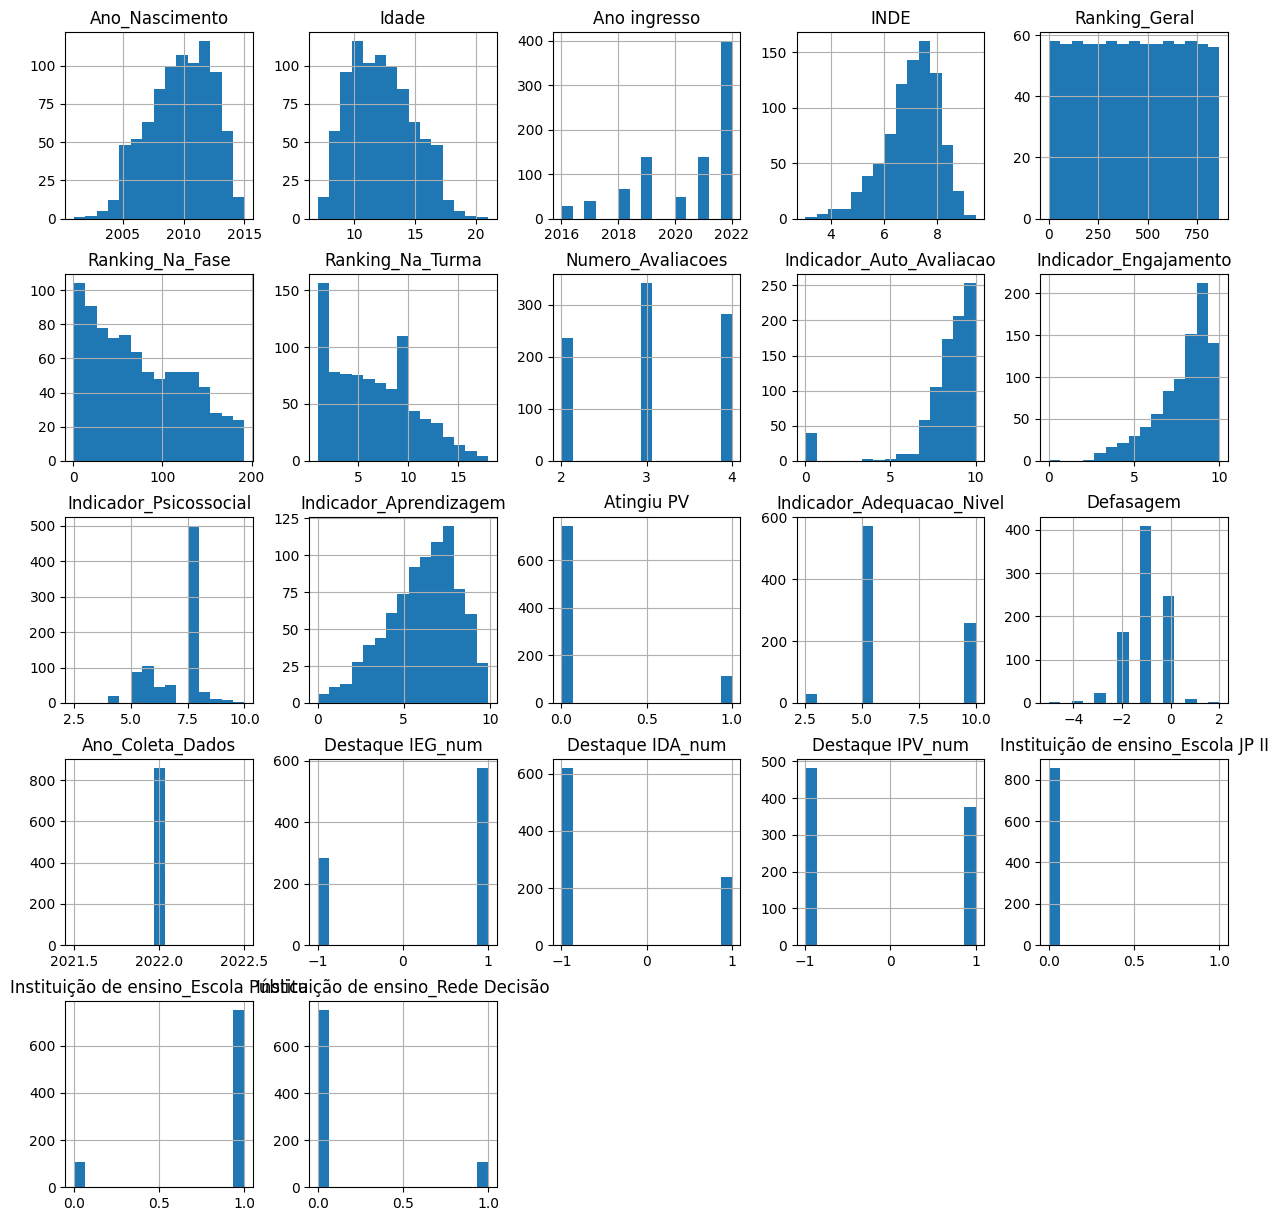

In [91]:
df_alunos.hist(bins=15,figsize=(15,15))
plt.show()

In [92]:
# vamos separar uma parte da base para teste antes mesmo de começar a mexer com outras análises

# deixando apenas os dados numericos
numeric_df = df_alunos.select_dtypes(include=['number'])

X = numeric_df.drop(columns=["Atingiu PV"])  
y = numeric_df["Atingiu PV"]

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, 
#     test_size=0.2,  
#     random_state=42
# )

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [93]:
import numpy as np

print("Distribuição das classes no treino:")
print(np.bincount(y_train))

print("\nDistribuição das classes no teste:")
print(np.bincount(y_test))

Distribuição das classes no treino:
[598  90]

Distribuição das classes no teste:
[149  23]


In [94]:
X_train.head(2)

,Ano_Nascimento,Idade,Ano ingresso,INDE,Ranking_Geral,Ranking_Na_Fase,Ranking_Na_Turma,Numero_Avaliacoes,Indicador_Auto_Avaliacao,Indicador_Engajamento,...,Indicador_Aprendizagem,Indicador_Adequacao_Nivel,Defasagem,Ano_Coleta_Dados,Destaque IEG_num,Destaque IDA_num,Destaque IPV_num,Instituição de ensino_Escola JP II,Instituição de ensino_Escola Pública,Instituição de ensino_Rede Decisão
51,2009,13,2018,7.861,183.0,12,5,3,9.6,8.9,...,6.2,10.0,2,2022,1,-1,1,0.0,0.0,1.0
383,2010,12,2017,7.558,291.0,44,2,3,9.0,8.4,...,8.1,5.0,-1,2022,1,1,1,0.0,1.0,0.0


In [95]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, 51 to 124
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Ano_Nascimento                        688 non-null    int64  
 1   Idade                                 688 non-null    int64  
 2   Ano ingresso                          688 non-null    int64  
 3   INDE                                  688 non-null    float64
 4   Ranking_Geral                         688 non-null    float64
 5   Ranking_Na_Fase                       688 non-null    int64  
 6   Ranking_Na_Turma                      688 non-null    int64  
 7   Numero_Avaliacoes                     688 non-null    int64  
 8   Indicador_Auto_Avaliacao              688 non-null    float64
 9   Indicador_Engajamento                 688 non-null    float64
 10  Indicador_Psicossocial                688 non-null    float64
 11  Indicador_Aprendizagem 

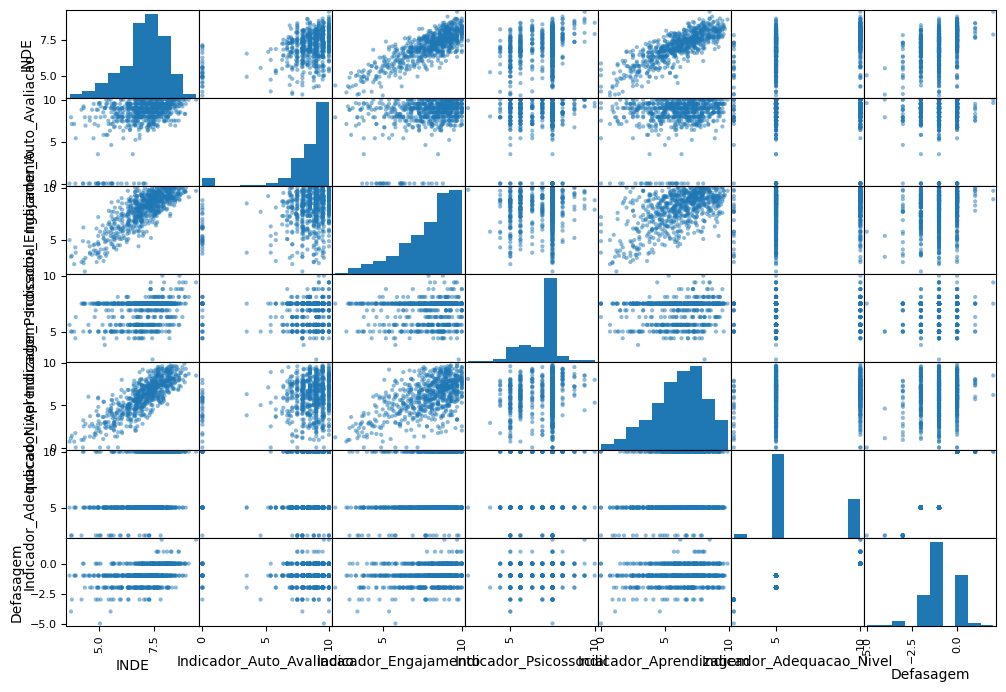

In [96]:
# checando correlação
from pandas.plotting import scatter_matrix

attributes = ["INDE","Indicador_Auto_Avaliacao","Indicador_Engajamento","Indicador_Psicossocial","Indicador_Aprendizagem","Indicador_Adequacao_Nivel","Defasagem"]
scatter_matrix(X_train[attributes], figsize=(12,8))
plt.show()

<Axes: >

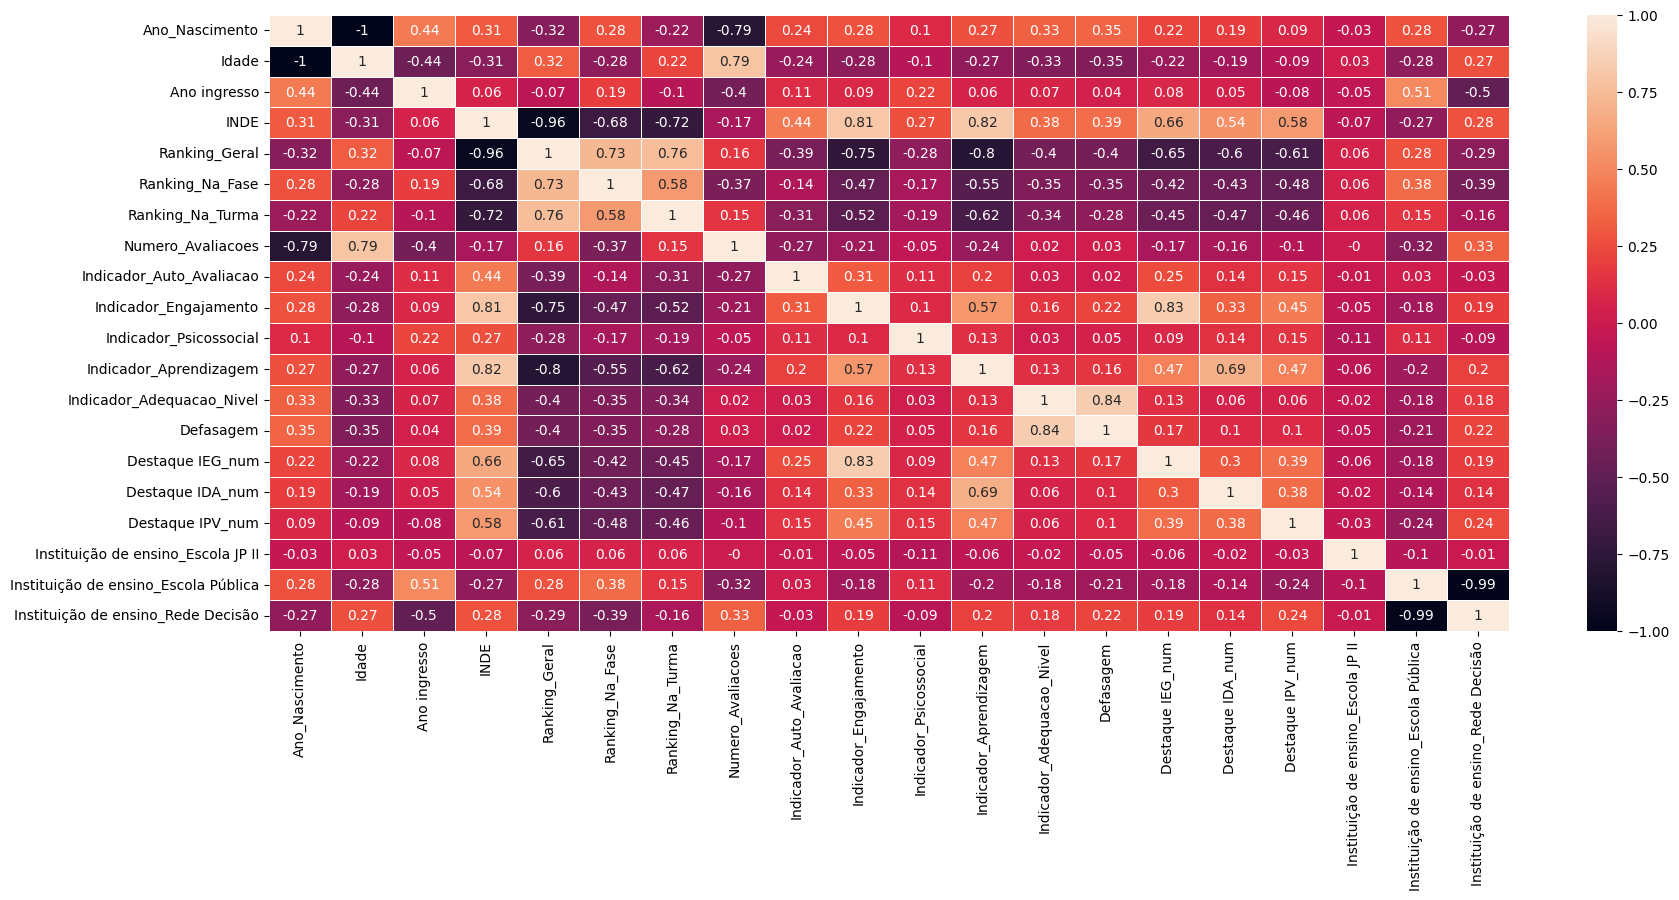

In [97]:
correlation_matrix = X_train.drop(columns=["Ano_Coleta_Dados"]).corr().round(2)
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

#### Treinando modelos

In [98]:
from sklearn.preprocessing import StandardScaler
# 📌 3. Normalizar os dados (opcional, mas útil para certos modelos)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
# 📌 Treinar os Modelos - LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)

# 📌 Avaliar o modelo
print("📊 Regressão Logística")
print(classification_report(y_test, log_preds))

📊 Regressão Logística
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       149
           1       0.75      0.52      0.62        23

    accuracy                           0.91       172
   macro avg       0.84      0.75      0.78       172
weighted avg       0.91      0.91      0.91       172



In [100]:
# 📌 Treinar os Modelos - RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

# 📌 Avaliar o modelo
print("\n🌳 Random Forest")
print(classification_report(y_test, rf_preds))


🌳 Random Forest
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       149
           1       0.75      0.39      0.51        23

    accuracy                           0.90       172
   macro avg       0.83      0.69      0.73       172
weighted avg       0.89      0.90      0.89       172



In [101]:
# 📌 Treinar os Modelos - XGBOOST
from xgboost import XGBClassifier

xgb_model = XGBClassifier(objective="binary:logistic", eval_metric="logloss")
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

# 📌 Avaliar o modelo
print("\n🚀 XGBoost")
print(classification_report(y_test, xgb_preds))


🚀 XGBoost
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       149
           1       0.69      0.48      0.56        23

    accuracy                           0.90       172
   macro avg       0.81      0.72      0.75       172
weighted avg       0.89      0.90      0.89       172



In [109]:
# 📌 Treinar os Modelos - SVC
from sklearn.svm import SVC


svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\n🎯 SVC")
print(classification_report(y_test, y_pred_svm))
# f1_svm = f1_score(y_test, y_pred_svm)
# print(f'F1-Score SVM: {f1_svm:.4f}')


🎯 SVC
              precision    recall  f1-score   support

           0       0.97      0.78      0.86       149
           1       0.37      0.83      0.51        23

    accuracy                           0.78       172
   macro avg       0.67      0.80      0.68       172
weighted avg       0.89      0.78      0.81       172



In [110]:
print("📊 Regressão Logística")
print(classification_report(y_test, log_preds))

print("\n🌳 Random Forest")
print(classification_report(y_test, rf_preds))

print("\n🚀 XGBoost")
print(classification_report(y_test, xgb_preds))

print("\n🎯 SVC")
print(classification_report(y_test, y_pred_svm))

📊 Regressão Logística
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       149
           1       0.75      0.52      0.62        23

    accuracy                           0.91       172
   macro avg       0.84      0.75      0.78       172
weighted avg       0.91      0.91      0.91       172


🌳 Random Forest
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       149
           1       0.75      0.39      0.51        23

    accuracy                           0.90       172
   macro avg       0.83      0.69      0.73       172
weighted avg       0.89      0.90      0.89       172


🚀 XGBoost
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       149
           1       0.69      0.48      0.56        23

    accuracy                           0.90       172
   macro avg       0.81      0.72      0.75       172
weighted avg       0.89 

#### Realizar validação cruzada

In [111]:
from sklearn.model_selection import cross_val_score

# Definir número de folds
k = 5  # Divide os dados em 5 partes

# 📌 Regressão Logística
log_scores = cross_val_score(log_model, X_train, y_train, cv=k, scoring="accuracy")
print(f"📊 Regressão Logística - Acurácia média: {log_scores.mean():.4f}")

# 📌 Random Forest
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=k, scoring="accuracy")
print(f"🌳 Random Forest - Acurácia média: {rf_scores.mean():.4f}")

# 📌 XGBoost
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=k, scoring="accuracy")
print(f"🚀 XGBoost - Acurácia média: {xgb_scores.mean():.4f}")

# 📌 SVC
svc_scores = cross_val_score(svm_model, X_train, y_train, cv=k, scoring="accuracy")
print(f"🚀 SVC - Acurácia média: {svc_scores.mean():.4f}")

📊 Regressão Logística - Acurácia média: 0.9303
🌳 Random Forest - Acurácia média: 0.9186
🚀 XGBoost - Acurácia média: 0.9215
🚀 SVC - Acurácia média: 0.8358


#### Validação usando F1-Score

In [112]:
from sklearn.metrics import f1_score

modelos = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Regressão Logística": LogisticRegression(random_state=42, max_iter=500),
    "XGBoost": XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42),
    "SVC":  SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
}

# Dicionário para armazenar os F1-Scores
f1_scores = {}

# Treinar e avaliar cada modelo
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)  # Treinamento
    y_pred = modelo.predict(X_test)  # Previsão
    f1 = f1_score(y_test, y_pred)  # Cálculo do F1-Score
    f1_scores[nome] = f1  # Armazena no dicionário
    print(f"{nome} - F1-Score: {f1:.4f}")

# Exibir os F1-Scores de todos os modelos
print("\nComparação de F1-Scores:", f1_scores)

Random Forest - F1-Score: 0.5143
Regressão Logística - F1-Score: 0.6154
XGBoost - F1-Score: 0.5641
SVC - F1-Score: 0.5067

Comparação de F1-Scores: {'Random Forest': 0.5142857142857142, 'Regressão Logística': 0.6153846153846154, 'XGBoost': 0.5641025641025641, 'SVC': 0.5066666666666667}


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Valores de regularização
logreg = LogisticRegression(max_iter=500, random_state=42)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Melhor parâmetros:", grid_search.best_params_)
print("Melhor F1-Score:", grid_search.best_score_)

Melhor parâmetros: {'C': 100}
Melhor F1-Score: 0.8593262894191687


In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = RandomizedSearchCV(rf, param_grid, cv=5, scoring='f1', n_iter=10, random_state=42)
grid_search.fit(X_train, y_train)

print("Melhor parâmetros:", grid_search.best_params_)
print("Melhor F1-Score:", grid_search.best_score_)

Melhor parâmetros: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Melhor F1-Score: 0.6505721515356403


In [107]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(eval_metric="logloss", objective="binary:logistic",random_state=42)
grid_search = RandomizedSearchCV(xgb, param_grid, cv=5, scoring='f1', n_iter=10, random_state=42)
grid_search.fit(X_train, y_train)

print("Melhor parâmetros:", grid_search.best_params_)
print("Melhor F1-Score:", grid_search.best_score_)

Melhor parâmetros: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2}
Melhor F1-Score: 0.7077291976021559


In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(kernel='rbf', probability=True, class_weight='balanced'), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Melhor parâmetros:", grid_search.best_params_)
print("Melhor F1-Score:", grid_search.best_score_)

Melhor parâmetros: {'C': 100}
Melhor F1-Score: 0.656392760356175
